In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

In [ ]:
def handle_alpha_for_ac(df):
  df['Block_size'] = df['Alpha'].apply(lambda x: int(x)*5)
  df['Strictness'] = df['Alpha'].apply(lambda x: round(math.modf(x)[0]*10))
  df = df.drop(columns = ['Alpha'])
  return df

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### time comparison 


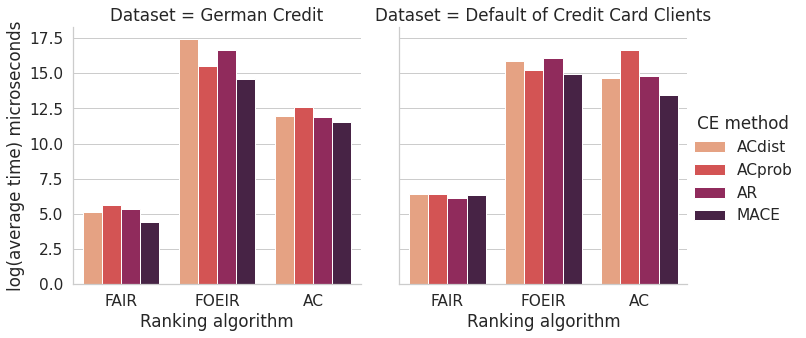

In [ ]:
#Ranking algorithms time
sns.set(font_scale=1.4)
sns.set_style("whitegrid")
dftime = pd.read_csv('/content/drive/My Drive/diss_metrics/time.csv')
dftime['Dataset'] = dftime.apply(lambda x:  'German Credit' if x['Dataset'] == 'german' else 'Default of Credit Card Clients', axis = 1)
dftime['cg_method'] = dftime.apply(lambda x:  x['cg_method'] if x['cg_method'] != 'AC' else x['cg_method']+x['base'], axis = 1)
dftime['avg_time'] = np.log(dftime['avg_time']*(10**6))
ax=sns.catplot(x='rank', y='avg_time', hue='cg_method', kind="bar", data=dftime, col='Dataset',  palette="rocket_r")
ax._legend.set_title("CE method")
#plt.legend(loc='center right',bbox_to_anchor=(1.05, 0.5))
ax.set(xlabel='Ranking algorithm', ylabel='log(average time) microseconds')
plt.savefig('ranktime')

#### distance and probability-based approaches comparison. AC ranking analysis


In [ ]:
dist_ac = handle_alpha_for_ac(pd.read_csv('/content/drive/My Drive/diss_metrics/ACdistAC.csv'))
prob_ac = handle_alpha_for_ac(pd.read_csv('/content/drive/My Drive/diss_metrics/ACprobAC.csv'))
all = (pd.read_csv('/content/drive/My Drive/diss_metrics/metric.csv'))
ratio = (pd.read_csv('/content/drive/My Drive/diss_metrics/ratio.csv'))

dist_ac['Dataset'] = dist_ac.apply(lambda x:  'German Credit' if x['Dataset'] == 'german' else 'Default of Credit Card Clients', axis = 1)
prob_ac['Dataset'] = prob_ac.apply(lambda x:  'German Credit' if x['Dataset'] == 'german' else 'Default of Credit Card Clients', axis = 1)
all['Dataset'] = all.apply(lambda x:  'German Credit' if x['Dataset'] == 'german' else 'Default of Credit Card Clients', axis = 1)
ratio['Dataset'] = ratio.apply(lambda x:  'German Credit' if x['Dataset'] == 'german' else 'Default of Credit Card Clients', axis = 1)


In [ ]:
concatenated = pd.concat([prob_ac.assign(approach='prob'), dist_ac.assign(approach='dist')],ignore_index=True)
concatenated['rKL'] = np.log(concatenated['rKL'])
concatenated['rND'] = np.log(concatenated['rND'])
concatenated['rRD'] = np.log(concatenated['rRD'])


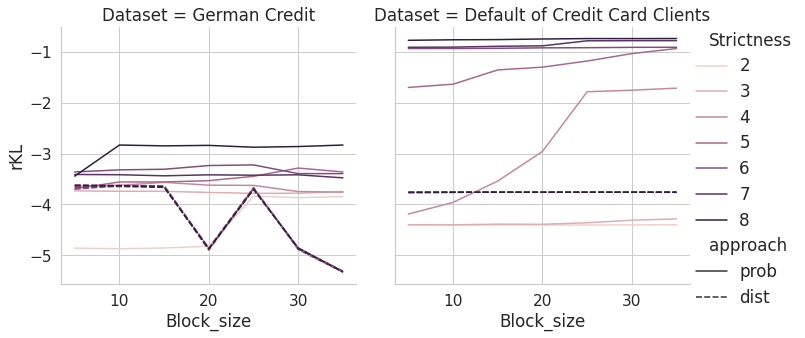

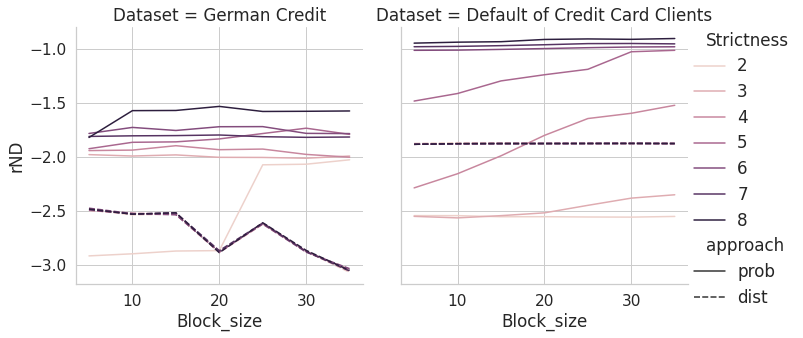

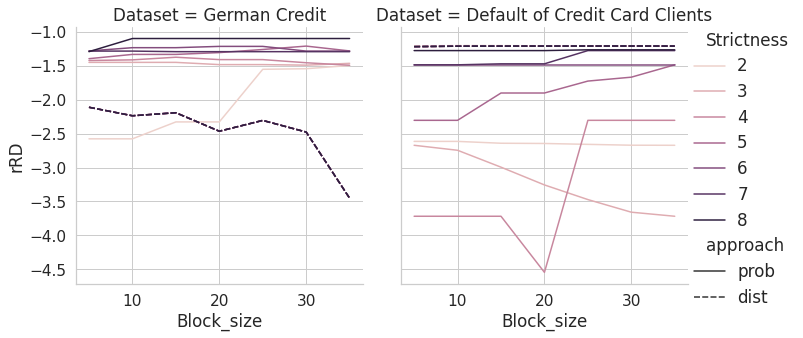

In [ ]:

sns.relplot(x='Block_size', y='rKL', data=concatenated,
                hue='Strictness', col = 'Dataset', kind = 'line', style = 'approach')
sns.relplot(x='Block_size', y='rND', data=concatenated,
                hue='Strictness', col = 'Dataset', kind = 'line', style = 'approach')
sns.relplot(x='Block_size', y='rRD', data=concatenated,
                hue='Strictness', col = 'Dataset', kind = 'line', style = 'approach')
plt.show()
#plt.savefig()

In [ ]:
#Baselines vs AC (ranking factors comparison)
ACprob = pd.read_csv('/content/drive/MyDrive/diss_metrics/ACprobINITIAL.csv')
ACdist = pd.read_csv('/content/drive/MyDrive/diss_metrics/ACdistINITIAL.csv')
ACprobAC = handle_alpha_for_ac( pd.read_csv('/content/drive/MyDrive/diss_metrics/ACprobAC.csv'))
ACdistAC = handle_alpha_for_ac( pd.read_csv('/content/drive/MyDrive/diss_metrics/ACdistAC.csv'))

ACprob['Dataset'] = ACprob.apply(lambda x:  'German Credit' if x['Dataset'] == 'german' else 'Default of Credit Card Clients', axis = 1)
ACdist['Dataset'] = ACdist.apply(lambda x:  'German Credit' if x['Dataset'] == 'german' else 'Default of Credit Card Clients', axis = 1)
ACprobAC['Dataset'] = ACprobAC.apply(lambda x:  'German Credit' if x['Dataset'] == 'german' else 'Default of Credit Card Clients', axis = 1)
ACdistAC['Dataset'] = ACdistAC.apply(lambda x:  'German Credit' if x['Dataset'] == 'german' else 'Default of Credit Card Clients', axis = 1)

baseline = pd.concat([ACprob.assign(approach='Probability'), ACdist.assign(approach='Distance')],ignore_index=True)

In [ ]:
baselinerKL = pd.DataFrame(baseline, columns=['Dataset', 'rKL', 'approach'])
baselinerND = pd.DataFrame(baseline, columns=['Dataset', 'rND', 'approach'])
baselinerRD = pd.DataFrame(baseline, columns=['Dataset', 'rRD', 'approach'])
baselinerKL = baselinerKL.rename(columns={'rKL' : 'value'})
baselinerND = baselinerND.rename(columns={'rND' : 'value'})
baselinerRD = baselinerRD.rename(columns={'rRD' : 'value'})
baseline_new = pd.concat([baselinerKL.assign(metric='rKL'), baselinerND.assign(metric='rND'), baselinerRD.assign(metric='rRD')], ignore_index=True)


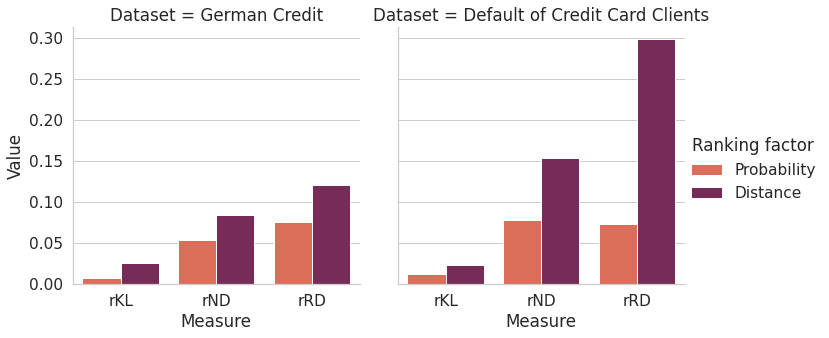

In [ ]:

ax=sns.catplot(x='metric', y='value', hue='approach', kind="bar", data=baseline_new, col='Dataset',  palette="rocket_r")
ax._legend.set_title("Ranking factor")
ax.set(xlabel='Measure', ylabel='Value')
plt.savefig('baselinerank_factor')

In [ ]:
AC = pd.concat([ACprobAC.assign(approach='Probability'), ACdistAC.assign(approach='Distance')],ignore_index=True)
AC = AC.loc[(AC['Block_size'] == 35) & ((AC['Strictness'] == 8) | (AC['Strictness'] == 2)) |
 (AC['Block_size'] == 5) & ((AC['Strictness'] == 8) | (AC['Strictness'] == 2))]
AC['Parameters'] = AC.apply(lambda x:  str(x['Block_size'])+'.'+str(x['Strictness']), axis = 1)

ACrKL = pd.DataFrame(AC, columns=['Dataset', 'rKL', 'approach', 'Parameters'])
ACrND = pd.DataFrame(AC, columns=['Dataset', 'rND', 'approach', 'Parameters'])
ACrRD = pd.DataFrame(AC, columns=['Dataset', 'rRD', 'approach','Parameters'])
ACrKL = ACrKL.rename(columns={'rKL' : 'value'})
ACrND = ACrND.rename(columns={'rND' : 'value'})
ACrRD = ACrRD.rename(columns={'rRD' : 'value'})
AC_new = pd.concat([ACrKL.assign(metric='rKL'), ACrND.assign(metric='rND'), ACrRD.assign(metric='rRD')], ignore_index=True)


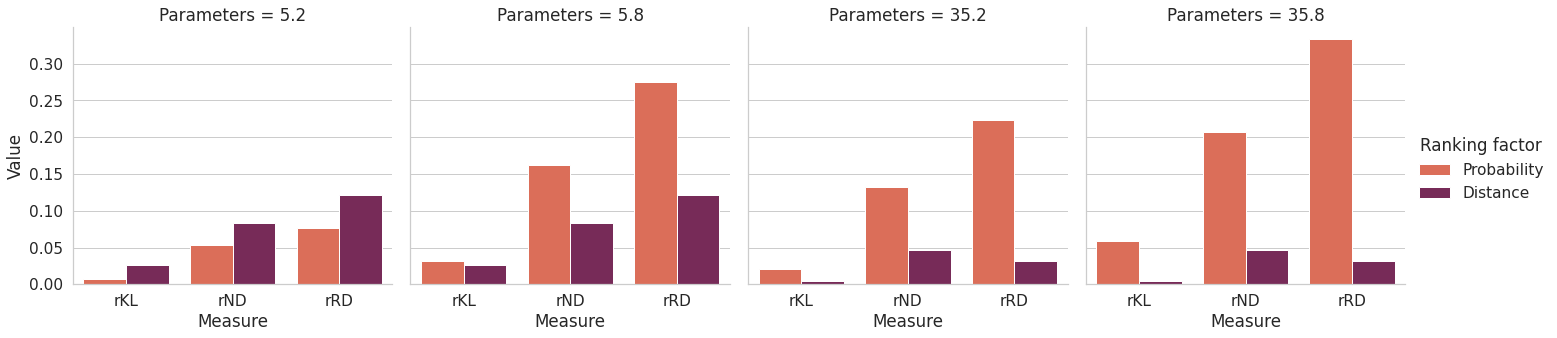

In [ ]:
AC_new_german = AC_new[AC_new['Dataset'] == 'German Credit']
ax=sns.catplot(x='metric', y='value', hue='approach',  kind="bar", data=AC_new_german, col='Parameters',  palette="rocket_r")
ax._legend.set_title("Ranking factor")
ax.set(xlabel='Measure', ylabel='Value')
plt.savefig('ACrank_factor_german')

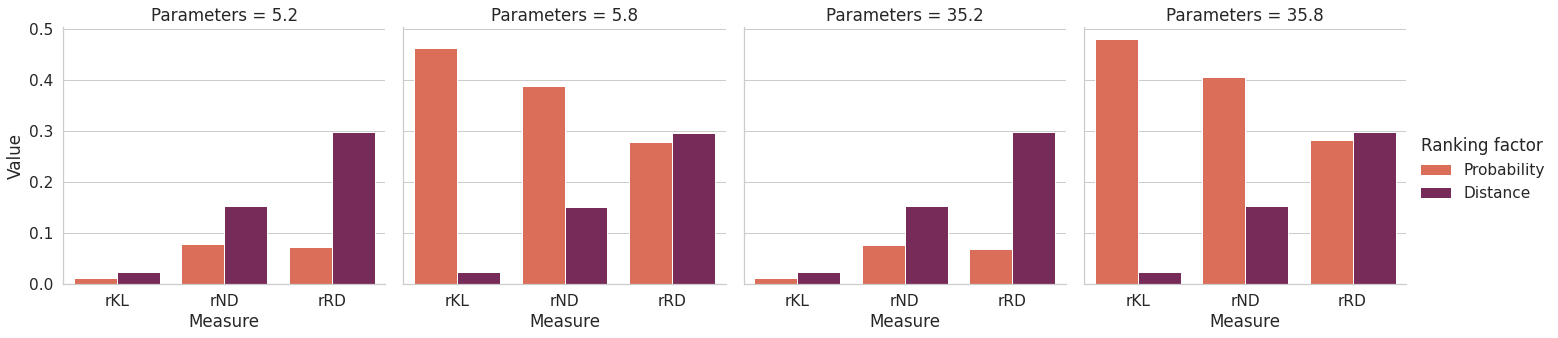

In [ ]:
AC_new_credit = AC_new[AC_new['Dataset'] != 'German Credit']
ax=sns.catplot(x='metric', y='value', hue='approach',  kind="bar", data=AC_new_credit, col='Parameters',  palette="rocket_r")
ax._legend.set_title("Ranking factor")
ax.set(xlabel='Measure', ylabel='Value')
plt.savefig('ACrank_factor_credit')

In [ ]:
ratio = (pd.read_csv('/content/drive/My Drive/diss_metrics/ratio.csv'))
ratio = ratio[ratio['base'] == 'prob']
ratio['Dataset'] = ratio.apply(lambda x:  'German Credit' if x['Dataset'] == 'german' else 'Default of Credit Card Clients', axis = 1)
ratio['rank'] = ratio.apply(lambda x:  'Baseline' if x['rank'] == 'INITIAL' else 'AC', axis = 1)
ratio = ratio.append([ratio[ratio['rank'] == 'Baseline']] * 48, ignore_index=True)

for d in ['German Credit', 'Default of Credit Card Clients']:
  #print(d, base)
  #print(len(ratio.loc[(ratio['rank'] == 'INITIAL') & (ratio['Dataset'] == d) & (ratio['base'] == base)]))
  dff = ratio.loc[(ratio['rank'] == 'Baseline') & (ratio['Dataset'] == d)].copy()

  it = 0
  for strictness in range(2,9):
    for block_size in range(1,8):
      #print(block_size, strictness)
      dff.iloc[it, 4] = str(block_size*5)
      dff.iloc[it, 5] = str(strictness)
      it += 1
  ratio.loc[(ratio['rank'] == 'Baseline') & (ratio['Dataset'] == d)] = dff


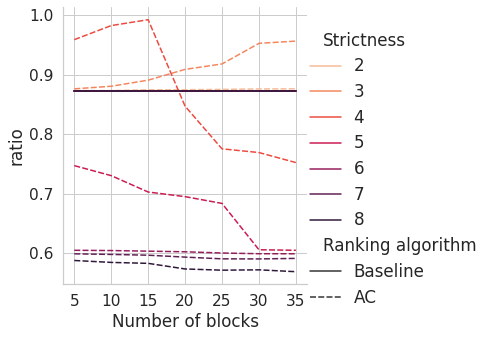

In [ ]:
#ACprobAC vs ACprob (use!)
ratio = ratio.rename(columns = {'Block_size' : 'Number of blocks', 'rank' : 'Ranking algorithm'})
ratio = ratio[ratio['Dataset'] != 'German Credit']
ax = sns.relplot(x="Number of blocks", y="ratio", hue="Strictness", data=ratio,
                 kind = 'line', style='Ranking algorithm', palette="rocket_r",
                 style_order = ['Baseline', 'AC'])
plt.savefig('ratio_credit')

### Rankings comparison 

In [ ]:
dist_ac = handle_alpha_for_ac(pd.read_csv('/content/drive/My Drive/diss_metrics/ACdistAC.csv'))
prob_ac = handle_alpha_for_ac(pd.read_csv('/content/drive/My Drive/diss_metrics/ACprobAC.csv'))
all = (pd.read_csv('/content/drive/My Drive/diss_metrics/metric.csv'))
ratio = (pd.read_csv('/content/drive/My Drive/diss_metrics/ratio.csv'))
all['cg_method'] = all.apply(lambda x:  x['cg_method'] if x['cg_method'] != 'AC' else x['cg_method']+x['base'], axis = 1)

dist_ac['Dataset'] = dist_ac.apply(lambda x:  'German Credit' if x['Dataset'] == 'german' else 'Default of Credit Card Clients', axis = 1)
prob_ac['Dataset'] = prob_ac.apply(lambda x:  'German Credit' if x['Dataset'] == 'german' else 'Default of Credit Card Clients', axis = 1)
all['Dataset'] = all.apply(lambda x:  'German Credit' if x['Dataset'] == 'german' else 'Default of Credit Card Clients', axis = 1)
ratio['Dataset'] = ratio.apply(lambda x:  'German Credit' if x['Dataset'] == 'german' else 'Default of Credit Card Clients', axis = 1)



In [ ]:
all = all[all['alpha'] != 'init']

In [ ]:
dist_ac = dist_ac[((dist_ac['Block_size'] == 5) | (dist_ac['Block_size'] == 35)) & ((dist_ac['Strictness'] == 2) | (dist_ac['Strictness'] == 8))]
prob_ac = prob_ac[((prob_ac['Block_size'] == 5) | (prob_ac['Block_size'] == 35)) & ((prob_ac['Strictness'] == 2) | (prob_ac['Strictness'] == 8))]







In [ ]:

r1 = {'Dataset':'German Credit', 'cg_method':'ACprob', 'base':'prob', 'rank':'AC', 'alpha':'5.2', 'rKL' : prob_ac.iloc[0, 6],'rND' :prob_ac.iloc[0, 7] ,	'rRD':prob_ac.iloc[0, 8]}
r2 = {'Dataset':'Default of Credit Card Clients', 'cg_method':'ACprob', 'base':'prob', 'rank':'AC', 'alpha':'5.2', 'rKL' :prob_ac.iloc[1, 6],'rND' : prob_ac.iloc[1, 7],	'rRD':prob_ac.iloc[1, 8]}
r3 = {'Dataset':'German Credit', 'cg_method':'ACprob', 'base':'prob', 'rank':'AC', 'alpha':'5.8', 'rKL' :prob_ac.iloc[2, 6],'rND' : prob_ac.iloc[2, 7],	'rRD':prob_ac.iloc[2, 8]}
r4 = {'Dataset':'Default of Credit Card Clients', 'cg_method':'ACprob', 'base':'prob', 'rank':'AC', 'alpha':'5.8', 'rKL' :prob_ac.iloc[3, 6],'rND' :prob_ac.iloc[3, 7] ,	'rRD':prob_ac.iloc[3, 8]}
r5 = {'Dataset':'German Credit', 'cg_method':'ACprob', 'base':'prob', 'rank':'AC', 'alpha':'35.2', 'rKL' : prob_ac.iloc[4, 6],'rND' :prob_ac.iloc[4, 7] ,	'rRD':prob_ac.iloc[4, 8]}
r6 = {'Dataset':'Default of Credit Card Clients', 'cg_method':'ACprob', 'base':'prob', 'rank':'AC', 'alpha':'35.2', 'rKL' :prob_ac.iloc[5, 6],'rND' : prob_ac.iloc[5, 7],	'rRD':prob_ac.iloc[5, 8]}
r7 = {'Dataset':'German Credit', 'cg_method':'ACprob', 'base':'prob', 'rank':'AC', 'alpha':'35.8', 'rKL' :prob_ac.iloc[6, 6],'rND' : prob_ac.iloc[6, 7],	'rRD':prob_ac.iloc[6, 8]}
r8 = {'Dataset':'Default of Credit Card Clients', 'cg_method':'ACprob', 'base':'prob', 'rank':'AC', 'alpha':'35.8', 'rKL' :prob_ac.iloc[7, 6],'rND' :prob_ac.iloc[7, 7] ,	'rRD':prob_ac.iloc[7, 8]}



#append row to the dataframe
all = all.append(r1, ignore_index=True)
all = all.append(r2, ignore_index=True)
all = all.append(r3, ignore_index=True)
all = all.append(r4, ignore_index=True)
all = all.append(r5, ignore_index=True)
all = all.append(r6, ignore_index=True)
all = all.append(r7, ignore_index=True)
all = all.append(r8, ignore_index=True)





In [ ]:

r1 = {'Dataset':'German Credit', 'cg_method':'ACdist', 'base':'dist', 'rank':'AC', 'alpha':'5.2', 'rKL' : dist_ac.iloc[0, 6],'rND' :dist_ac.iloc[0, 7] ,	'rRD':dist_ac.iloc[0, 8]}
r2 = {'Dataset':'Default of Credit Card Clients', 'cg_method':'ACdist', 'base':'dist', 'rank':'AC', 'alpha':'5.2', 'rKL' :dist_ac.iloc[1, 6],'rND' : dist_ac.iloc[1, 7],	'rRD':dist_ac.iloc[1, 8]}
r3 = {'Dataset':'German Credit', 'cg_method':'ACdist', 'base':'dist', 'rank':'AC', 'alpha':'5.8', 'rKL' :dist_ac.iloc[2, 6],'rND' : dist_ac.iloc[2, 7],	'rRD':dist_ac.iloc[2, 8]}
r4 = {'Dataset':'Default of Credit Card Clients', 'cg_method':'ACdist', 'base':'dist', 'rank':'AC', 'alpha':'5.8', 'rKL' :dist_ac.iloc[3, 6],'rND' :dist_ac.iloc[3, 7] ,	'rRD':dist_ac.iloc[3, 8]}
r5 = {'Dataset':'German Credit', 'cg_method':'ACdist', 'base':'dist', 'rank':'AC', 'alpha':'35.2', 'rKL' : dist_ac.iloc[4, 6],'rND' :dist_ac.iloc[4, 7] ,	'rRD':dist_ac.iloc[4, 8]}
r6 = {'Dataset':'Default of Credit Card Clients', 'cg_method':'ACdist', 'base':'dist', 'rank':'AC', 'alpha':'35.2', 'rKL' :dist_ac.iloc[5, 6],'rND' : dist_ac.iloc[5, 7],	'rRD':dist_ac.iloc[5, 8]}
r7 = {'Dataset':'German Credit', 'cg_method':'ACdist', 'base':'dist', 'rank':'AC', 'alpha':'35.8', 'rKL' :dist_ac.iloc[6, 6],'rND' : dist_ac.iloc[6, 7],	'rRD':dist_ac.iloc[6, 8]}
r8 = {'Dataset':'Default of Credit Card Clients', 'cg_method':'ACdist', 'base':'dist', 'rank':'AC', 'alpha':'35.8', 'rKL' :dist_ac.iloc[7, 6],'rND' :dist_ac.iloc[7, 7] ,	'rRD':dist_ac.iloc[7, 8]}



#append row to the dataframe
all = all.append(r1, ignore_index=True)
all = all.append(r2, ignore_index=True)
all = all.append(r3, ignore_index=True)
all = all.append(r4, ignore_index=True)
all = all.append(r5, ignore_index=True)
all = all.append(r6, ignore_index=True)
all = all.append(r7, ignore_index=True)
all = all.append(r8, ignore_index=True)

In [ ]:
all = all[(all['cg_method'] == 'ACdist') | (all['cg_method'] == 'ACprob') ]

In [ ]:
all['rank'] = all['rank'] + all['alpha']


In [ ]:
allrKL = pd.DataFrame(all, columns=['Dataset', 'rKL', 'cg_method', 'rank'])
allrND = pd.DataFrame(all, columns=['Dataset', 'rND', 'cg_method', 'rank'])
allrRD = pd.DataFrame(all, columns=['Dataset', 'rRD', 'cg_method', 'rank'])
allrKL = allrKL.rename(columns={'rKL' : 'value'})
allrND = allrND.rename(columns={'rND' : 'value'})
allrRD = allrRD.rename(columns={'rRD' : 'value'})
all_new = pd.concat([allrKL.assign(metric='rKL'), allrND.assign(metric='rND'), allrRD.assign(metric='rRD')], ignore_index=True)
all_new = all_new.rename(columns={'cg_method' : 'Ranking factor'})
all_new['Ranking factor'] = all_new.apply(lambda x: 'Prediction Prob' if x['Ranking factor'] == 'ACprob' else 'Distance', axis = 1)


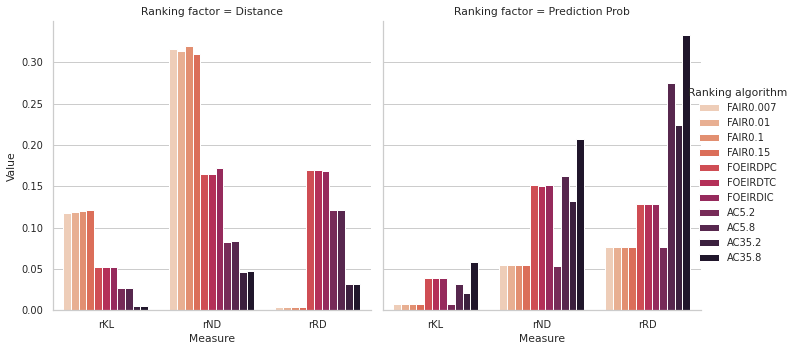

In [ ]:
sns.set(font_scale=0.9)

sns.set_style("whitegrid")

all_new_german = all_new[all_new['Dataset'] == 'German Credit']
ax=sns.catplot(x='metric', y='value', hue='rank',  kind="bar", data=all_new_german, col='Ranking factor',  palette="rocket_r")
ax._legend.set_title("Ranking algorithm")


ax.set(xlabel='Measure', ylabel='Value')

plt.savefig('GermanRankingAlgo')

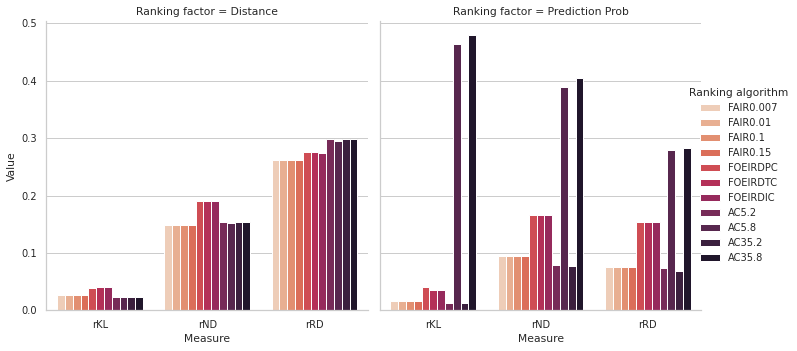

In [ ]:
all_new_credit = all_new[all_new['Dataset'] == 'Default of Credit Card Clients']
ax=sns.catplot(x='metric', y='value', hue='rank',  kind="bar", data=all_new_credit, col='Ranking factor',  palette="rocket_r")
ax._legend.set_title("Ranking algorithm")
ax.set(xlabel='Measure', ylabel='Value')
plt.savefig('CreditRankingAlgo')

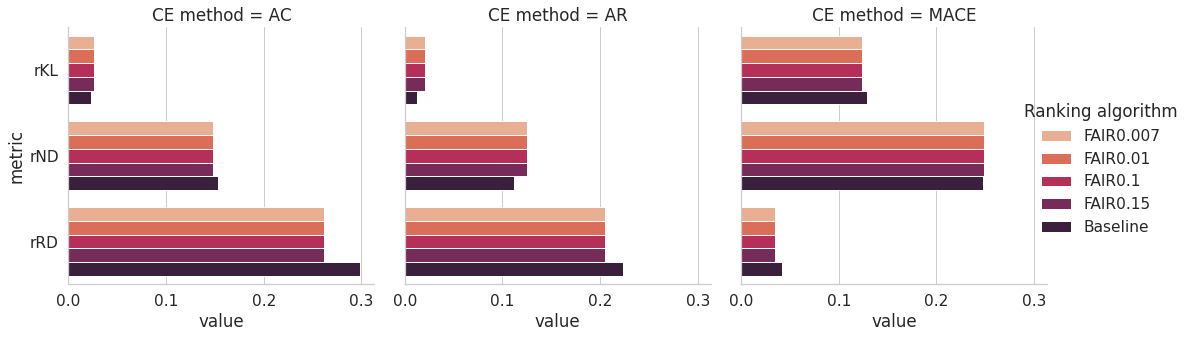

In [ ]:
#  fair vs baseline for all ce methods (only distance!)
all = (pd.read_csv('/content/drive/My Drive/diss_metrics/metric.csv'))
ratio = (pd.read_csv('/content/drive/My Drive/diss_metrics/ratio.csv'))
all['Dataset'] = all.apply(lambda x:  'German Credit' if x['Dataset'] == 'german' else 'Default of Credit Card Clients', axis = 1)
all['rank'] = all.apply(lambda x:  'Baseline' if x['rank'] == 'INITIAL' else x['rank']+x['alpha'], axis = 1)
all['alpha'] = all.apply(lambda x:  ' ' if x['alpha'] == 'init' else x['alpha'], axis = 1)
ratio['Dataset'] = ratio.apply(lambda x:  'German Credit' if x['Dataset'] == 'german' else 'Default of Credit Card Clients', axis = 1)
fair = all[(all['rank'] == 'FAIR0.007') | (all['rank'] == 'Baseline') | 
           (all['rank'] == 'FAIR0.01') | (all['rank'] == 'FAIR0.1') | (all['rank'] == 'FAIR0.15')]
fair = fair[(fair['base'] == 'dist')]

fairrKL = pd.DataFrame(fair, columns=['Dataset', 'rKL', 'cg_method', 'rank'])
fairrND = pd.DataFrame(fair, columns=['Dataset', 'rND', 'cg_method', 'rank'])
fairrRD = pd.DataFrame(fair, columns=['Dataset', 'rRD', 'cg_method', 'rank'])
fairrKL = fairrKL.rename(columns={'rKL' : 'value'})
fairrND = fairrND.rename(columns={'rND' : 'value'})
fairrRD = fairrRD.rename(columns={'rRD' : 'value'})
fair_new = pd.concat([fairrKL.assign(metric='rKL'), fairrND.assign(metric='rND'), fairrRD.assign(metric='rRD')], ignore_index=True)
fair_new = fair_new.rename(columns={'cg_method' : 'CE method'})
fair_new_credit = fair_new[fair_new['Dataset'] == 'Default of Credit Card Clients']
sns.set(font_scale=1.4)
sns.set_style("whitegrid")
ax = sns.catplot(x='value', y='metric', hue='rank', kind="bar", data= fair_new_credit, col = 'CE method', palette="rocket_r")
ax._legend.set_title("Ranking algorithm")
ax.set(xlabel='value', ylabel='metric')
plt.savefig('fair_credit')

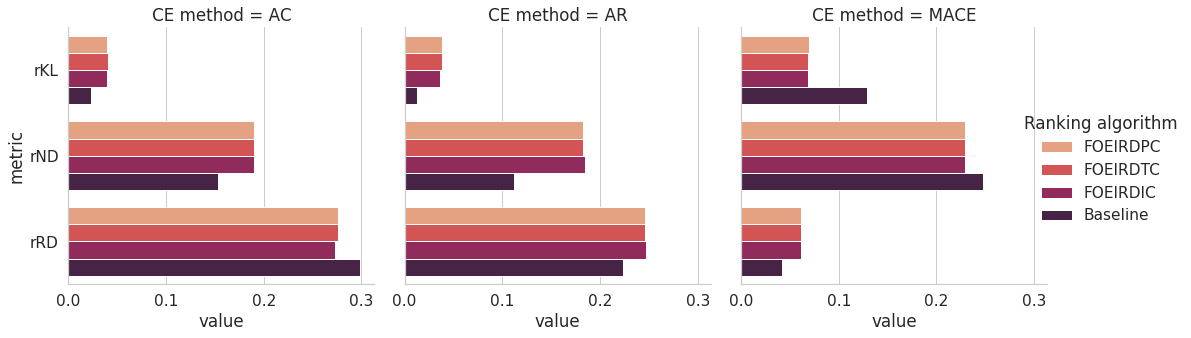

In [ ]:
#  foeir vs baseline for all ce methods (only distance!)
all = (pd.read_csv('/content/drive/My Drive/diss_metrics/metric.csv'))
ratio = (pd.read_csv('/content/drive/My Drive/diss_metrics/ratio.csv'))
all['Dataset'] = all.apply(lambda x:  'German Credit' if x['Dataset'] == 'german' else 'Default of Credit Card Clients', axis = 1)
all['rank'] = all.apply(lambda x:  'Baseline' if x['rank'] == 'INITIAL' else x['rank']+x['alpha'], axis = 1)
all['alpha'] = all.apply(lambda x:  ' ' if x['alpha'] == 'init' else x['alpha'], axis = 1)
ratio['Dataset'] = ratio.apply(lambda x:  'German Credit' if x['Dataset'] == 'german' else 'Default of Credit Card Clients', axis = 1)
foeir = all[(all['rank'] == 'FOEIRDIC') | (all['rank'] == 'Baseline') | 
           (all['rank'] == 'FOEIRDPC') | (all['rank'] == 'FOEIRDTC')]
foeir = foeir[(foeir['base'] == 'dist')]

foeirrKL = pd.DataFrame(foeir, columns=['Dataset', 'rKL', 'cg_method', 'rank'])
foeirrND = pd.DataFrame(foeir, columns=['Dataset', 'rND', 'cg_method', 'rank'])
foeirrRD = pd.DataFrame(foeir, columns=['Dataset', 'rRD', 'cg_method', 'rank'])
foeirrKL = foeirrKL.rename(columns={'rKL' : 'value'})
foeirrND = foeirrND.rename(columns={'rND' : 'value'})
foeirrRD = foeirrRD.rename(columns={'rRD' : 'value'})
foeir_new = pd.concat([foeirrKL.assign(metric='rKL'), foeirrND.assign(metric='rND'), foeirrRD.assign(metric='rRD')], ignore_index=True)
foeir_new = foeir_new.rename(columns={'cg_method' : 'CE method'})
foeir_new_credit = foeir_new[foeir_new['Dataset'] == 'Default of Credit Card Clients']
sns.set(font_scale=1.4)
sns.set_style("whitegrid")
ax = sns.catplot(x='value', y='metric', hue='rank', kind="bar", data= foeir_new_credit, col = 'CE method', palette="rocket_r")
ax._legend.set_title("Ranking algorithm")
ax.set(xlabel='value', ylabel='metric')
plt.savefig('foeir_credit')


In [ ]:
dist_ac = handle_alpha_for_ac(pd.read_csv('/content/drive/My Drive/diss_metrics/ACdistAC.csv'))
prob_ac = handle_alpha_for_ac(pd.read_csv('/content/drive/My Drive/diss_metrics/ACprobAC.csv'))
mace_ac = handle_alpha_for_ac(pd.read_csv('/content/drive/My Drive/diss_metrics/MACEdistAC.csv'))
ar_ac = handle_alpha_for_ac(pd.read_csv('/content/drive/My Drive/diss_metrics/ARdistAC.csv'))

all = (pd.read_csv('/content/drive/My Drive/diss_metrics/metric.csv'))
ratio = (pd.read_csv('/content/drive/My Drive/diss_metrics/ratio.csv'))
all['cg_method'] = all.apply(lambda x:  x['cg_method'] if x['cg_method'] != 'AC' else x['cg_method']+x['base'], axis = 1)

dist_ac['Dataset'] = dist_ac.apply(lambda x:  'German Credit' if x['Dataset'] == 'german' else 'Default of Credit Card Clients', axis = 1)
prob_ac['Dataset'] = prob_ac.apply(lambda x:  'German Credit' if x['Dataset'] == 'german' else 'Default of Credit Card Clients', axis = 1)
mace_ac['Dataset'] = mace_ac.apply(lambda x:  'German Credit' if x['Dataset'] == 'german' else 'Default of Credit Card Clients', axis = 1)
ar_ac['Dataset'] = ar_ac.apply(lambda x:  'German Credit' if x['Dataset'] == 'german' else 'Default of Credit Card Clients', axis = 1)

all['Dataset'] = all.apply(lambda x:  'German Credit' if x['Dataset'] == 'german' else 'Default of Credit Card Clients', axis = 1)
ratio['Dataset'] = ratio.apply(lambda x:  'German Credit' if x['Dataset'] == 'german' else 'Default of Credit Card Clients', axis = 1)
all = all[all['alpha'] != 'init']
dist_ac = dist_ac[((dist_ac['Block_size'] == 5) | (dist_ac['Block_size'] == 35)) & ((dist_ac['Strictness'] == 2) | (dist_ac['Strictness'] == 8))]
prob_ac = prob_ac[((prob_ac['Block_size'] == 5) | (prob_ac['Block_size'] == 35)) & ((prob_ac['Strictness'] == 2) | (prob_ac['Strictness'] == 8))]
mace_ac = mace_ac[((mace_ac['Block_size'] == 5) | (mace_ac['Block_size'] == 35)) & ((mace_ac['Strictness'] == 2) | (mace_ac['Strictness'] == 8))]
ar_ac = ar_ac[((ar_ac['Block_size'] == 5) | (ar_ac['Block_size'] == 35)) & ((ar_ac['Strictness'] == 2) | (ar_ac['Strictness'] == 8))]

r1 = {'Dataset':'German Credit', 'cg_method':'ACprob', 'base':'prob', 'rank':'AC', 'alpha':'5.2', 'rKL' : prob_ac.iloc[0, 6],'rND' :prob_ac.iloc[0, 7] ,	'rRD':prob_ac.iloc[0, 8]}
r2 = {'Dataset':'Default of Credit Card Clients', 'cg_method':'ACprob', 'base':'prob', 'rank':'AC', 'alpha':'5.2', 'rKL' :prob_ac.iloc[1, 6],'rND' : prob_ac.iloc[1, 7],	'rRD':prob_ac.iloc[1, 8]}
r3 = {'Dataset':'German Credit', 'cg_method':'ACprob', 'base':'prob', 'rank':'AC', 'alpha':'5.8', 'rKL' :prob_ac.iloc[2, 6],'rND' : prob_ac.iloc[2, 7],	'rRD':prob_ac.iloc[2, 8]}
r4 = {'Dataset':'Default of Credit Card Clients', 'cg_method':'ACprob', 'base':'prob', 'rank':'AC', 'alpha':'5.8', 'rKL' :prob_ac.iloc[3, 6],'rND' :prob_ac.iloc[3, 7] ,	'rRD':prob_ac.iloc[3, 8]}
r5 = {'Dataset':'German Credit', 'cg_method':'ACprob', 'base':'prob', 'rank':'AC', 'alpha':'35.2', 'rKL' : prob_ac.iloc[4, 6],'rND' :prob_ac.iloc[4, 7] ,	'rRD':prob_ac.iloc[4, 8]}
r6 = {'Dataset':'Default of Credit Card Clients', 'cg_method':'ACprob', 'base':'prob', 'rank':'AC', 'alpha':'35.2', 'rKL' :prob_ac.iloc[5, 6],'rND' : prob_ac.iloc[5, 7],	'rRD':prob_ac.iloc[5, 8]}
r7 = {'Dataset':'German Credit', 'cg_method':'ACprob', 'base':'prob', 'rank':'AC', 'alpha':'35.8', 'rKL' :prob_ac.iloc[6, 6],'rND' : prob_ac.iloc[6, 7],	'rRD':prob_ac.iloc[6, 8]}
r8 = {'Dataset':'Default of Credit Card Clients', 'cg_method':'ACprob', 'base':'prob', 'rank':'AC', 'alpha':'35.8', 'rKL' :prob_ac.iloc[7, 6],'rND' :prob_ac.iloc[7, 7] ,	'rRD':prob_ac.iloc[7, 8]}


#append row to the dataframe
all = all.append(r1, ignore_index=True)
all = all.append(r2, ignore_index=True)
all = all.append(r3, ignore_index=True)
all = all.append(r4, ignore_index=True)
all = all.append(r5, ignore_index=True)
all = all.append(r6, ignore_index=True)
all = all.append(r7, ignore_index=True)
all = all.append(r8, ignore_index=True)


r1 = {'Dataset':'German Credit', 'cg_method':'ACdist', 'base':'dist', 'rank':'AC', 'alpha':'5.2', 'rKL' : dist_ac.iloc[0, 6],'rND' :dist_ac.iloc[0, 7] ,	'rRD':dist_ac.iloc[0, 8]}
r2 = {'Dataset':'Default of Credit Card Clients', 'cg_method':'ACdist', 'base':'dist', 'rank':'AC', 'alpha':'5.2', 'rKL' :dist_ac.iloc[1, 6],'rND' : dist_ac.iloc[1, 7],	'rRD':dist_ac.iloc[1, 8]}
r3 = {'Dataset':'German Credit', 'cg_method':'ACdist', 'base':'dist', 'rank':'AC', 'alpha':'5.8', 'rKL' :dist_ac.iloc[2, 6],'rND' : dist_ac.iloc[2, 7],	'rRD':dist_ac.iloc[2, 8]}
r4 = {'Dataset':'Default of Credit Card Clients', 'cg_method':'ACdist', 'base':'dist', 'rank':'AC', 'alpha':'5.8', 'rKL' :dist_ac.iloc[3, 6],'rND' :dist_ac.iloc[3, 7] ,	'rRD':dist_ac.iloc[3, 8]}
r5 = {'Dataset':'German Credit', 'cg_method':'ACdist', 'base':'dist', 'rank':'AC', 'alpha':'35.2', 'rKL' : dist_ac.iloc[4, 6],'rND' :dist_ac.iloc[4, 7] ,	'rRD':dist_ac.iloc[4, 8]}
r6 = {'Dataset':'Default of Credit Card Clients', 'cg_method':'ACdist', 'base':'dist', 'rank':'AC', 'alpha':'35.2', 'rKL' :dist_ac.iloc[5, 6],'rND' : dist_ac.iloc[5, 7],	'rRD':dist_ac.iloc[5, 8]}
r7 = {'Dataset':'German Credit', 'cg_method':'ACdist', 'base':'dist', 'rank':'AC', 'alpha':'35.8', 'rKL' :dist_ac.iloc[6, 6],'rND' : dist_ac.iloc[6, 7],	'rRD':dist_ac.iloc[6, 8]}
r8 = {'Dataset':'Default of Credit Card Clients', 'cg_method':'ACdist', 'base':'dist', 'rank':'AC', 'alpha':'35.8', 'rKL' :dist_ac.iloc[7, 6],'rND' :dist_ac.iloc[7, 7] ,	'rRD':dist_ac.iloc[7, 8]}


#append row to the dataframe
all = all.append(r1, ignore_index=True)
all = all.append(r2, ignore_index=True)
all = all.append(r3, ignore_index=True)
all = all.append(r4, ignore_index=True)
all = all.append(r5, ignore_index=True)
all = all.append(r6, ignore_index=True)
all = all.append(r7, ignore_index=True)
all = all.append(r8, ignore_index=True)



r1 = {'Dataset':'German Credit', 'cg_method':'MACE', 'base':'dist', 'rank':'AC', 'alpha':'5.2', 'rKL' : mace_ac.iloc[0, 6],'rND' :mace_ac.iloc[0, 7] ,	'rRD':mace_ac.iloc[0, 8]}
r2 = {'Dataset':'Default of Credit Card Clients', 'cg_method':'MACE', 'base':'dist', 'rank':'AC', 'alpha':'5.2', 'rKL' :mace_ac.iloc[1, 6],'rND' : mace_ac.iloc[1, 7],	'rRD':mace_ac.iloc[1, 8]}
r3 = {'Dataset':'German Credit', 'cg_method':'MACE', 'base':'dist', 'rank':'AC', 'alpha':'5.8', 'rKL' :mace_ac.iloc[2, 6],'rND' : mace_ac.iloc[2, 7],	'rRD':mace_ac.iloc[2, 8]}
r4 = {'Dataset':'Default of Credit Card Clients', 'cg_method':'MACE', 'base':'dist', 'rank':'AC', 'alpha':'5.8', 'rKL' :mace_ac.iloc[3, 6],'rND' :mace_ac.iloc[3, 7] ,	'rRD':mace_ac.iloc[3, 8]}
r5 = {'Dataset':'German Credit', 'cg_method':'MACE', 'base':'dist', 'rank':'AC', 'alpha':'35.2', 'rKL' : mace_ac.iloc[4, 6],'rND' :mace_ac.iloc[4, 7] ,	'rRD':mace_ac.iloc[4, 8]}
r6 = {'Dataset':'Default of Credit Card Clients', 'cg_method':'MACE', 'base':'dist', 'rank':'AC', 'alpha':'35.2', 'rKL' :mace_ac.iloc[5, 6],'rND' : mace_ac.iloc[5, 7],	'rRD':mace_ac.iloc[5, 8]}
r7 = {'Dataset':'German Credit', 'cg_method':'MACE', 'base':'dist', 'rank':'AC', 'alpha':'35.8', 'rKL' :mace_ac.iloc[6, 6],'rND' : mace_ac.iloc[6, 7],	'rRD':mace_ac.iloc[6, 8]}
r8 = {'Dataset':'Default of Credit Card Clients', 'cg_method':'MACE', 'base':'dist', 'rank':'AC', 'alpha':'35.8', 'rKL' :mace_ac.iloc[7, 6],'rND' :mace_ac.iloc[7, 7] ,	'rRD':mace_ac.iloc[7, 8]}


#append row to the dataframe
all = all.append(r1, ignore_index=True)
all = all.append(r2, ignore_index=True)
all = all.append(r3, ignore_index=True)
all = all.append(r4, ignore_index=True)
all = all.append(r5, ignore_index=True)
all = all.append(r6, ignore_index=True)
all = all.append(r7, ignore_index=True)
all = all.append(r8, ignore_index=True)



r1 = {'Dataset':'German Credit', 'cg_method':'AR', 'base':'dist', 'rank':'AC', 'alpha':'5.2', 'rKL' : ar_ac.iloc[0, 6],'rND' :ar_ac.iloc[0, 7] ,	'rRD':ar_ac.iloc[0, 8]}
r2 = {'Dataset':'Default of Credit Card Clients', 'cg_method':'AR', 'base':'dist', 'rank':'AC', 'alpha':'5.2', 'rKL' :ar_ac.iloc[1, 6],'rND' : ar_ac.iloc[1, 7],	'rRD':ar_ac.iloc[1, 8]}
r3 = {'Dataset':'German Credit', 'cg_method':'AR', 'base':'dist', 'rank':'AC', 'alpha':'5.8', 'rKL' :ar_ac.iloc[2, 6],'rND' : ar_ac.iloc[2, 7],	'rRD':ar_ac.iloc[2, 8]}
r4 = {'Dataset':'Default of Credit Card Clients', 'cg_method':'AR', 'base':'dist', 'rank':'AC', 'alpha':'5.8', 'rKL' :ar_ac.iloc[3, 6],'rND' :ar_ac.iloc[3, 7] ,	'rRD':ar_ac.iloc[3, 8]}
r5 = {'Dataset':'German Credit', 'cg_method':'AR', 'base':'dist', 'rank':'AC', 'alpha':'35.2', 'rKL' : ar_ac.iloc[4, 6],'rND' :ar_ac.iloc[4, 7] ,	'rRD':ar_ac.iloc[4, 8]}
r6 = {'Dataset':'Default of Credit Card Clients', 'cg_method':'AR', 'base':'dist', 'rank':'AC', 'alpha':'35.2', 'rKL' :ar_ac.iloc[5, 6],'rND' : ar_ac.iloc[5, 7],	'rRD':ar_ac.iloc[5, 8]}
r7 = {'Dataset':'German Credit', 'cg_method':'AR', 'base':'dist', 'rank':'AC', 'alpha':'35.8', 'rKL' :ar_ac.iloc[6, 6],'rND' : ar_ac.iloc[6, 7],	'rRD':ar_ac.iloc[6, 8]}
r8 = {'Dataset':'Default of Credit Card Clients', 'cg_method':'AR', 'base':'dist', 'rank':'AC', 'alpha':'35.8', 'rKL' :ar_ac.iloc[7, 6],'rND' :ar_ac.iloc[7, 7] ,	'rRD':ar_ac.iloc[7, 8]}


#append row to the dataframe
all = all.append(r1, ignore_index=True)
all = all.append(r2, ignore_index=True)
all = all.append(r3, ignore_index=True)
all = all.append(r4, ignore_index=True)
all = all.append(r5, ignore_index=True)
all = all.append(r6, ignore_index=True)
all = all.append(r7, ignore_index=True)
all = all.append(r8, ignore_index=True)




all['rank'] = all['rank'] + all['alpha']

allrKL = pd.DataFrame(all, columns=['Dataset', 'rKL', 'cg_method', 'rank', 'base'])
allrND = pd.DataFrame(all, columns=['Dataset', 'rND', 'cg_method', 'rank', 'base'])
allrRD = pd.DataFrame(all, columns=['Dataset', 'rRD', 'cg_method', 'rank', 'base'])
allrKL = allrKL.rename(columns={'rKL' : 'value'})
allrND = allrND.rename(columns={'rND' : 'value'})
allrRD = allrRD.rename(columns={'rRD' : 'value'})
all_new = pd.concat([allrKL.assign(metric='rKL'), allrND.assign(metric='rND'), allrRD.assign(metric='rRD')], ignore_index=True)
all_new = all_new.rename(columns={'base' : 'Ranking factor', 'cg_method' : 'CE method'})
all_new['Ranking factor'] = all_new.apply(lambda x: 'Prediction Prob' if x['Ranking factor'] == 'prob' else 'Distance', axis = 1)
all_new['CE method'] = all_new.apply(lambda x: 'AC' if (x['CE method'] == 'ACprob' or x['CE method'] == 'ACdist') else x['CE method'], axis = 1)



In [ ]:
rKL_dist = all_new[(all_new['metric'] == 'rKL') & (all_new['Ranking factor'] == 'Distance') ]
rKL_prob = all_new[(all_new['metric'] == 'rKL') & (all_new['Ranking factor'] == 'Prediction Prob') ]
rND_dist = all_new[(all_new['metric'] == 'rND') & (all_new['Ranking factor'] == 'Distance') ]
rND_prob = all_new[(all_new['metric'] == 'rND') & (all_new['Ranking factor'] == 'Prediction Prob') ]
rRD_dist = all_new[(all_new['metric'] == 'rRD') & (all_new['Ranking factor'] == 'Distance') ]
rRD_prob = all_new[(all_new['metric'] == 'rRD') & (all_new['Ranking factor'] == 'Prediction Prob') ]
rKL_dist

,Dataset,value,CE method,rank,Ranking factor,metric
0,German Credit,0.117662,AC,FAIR0.007,Distance,rKL
1,German Credit,0.119267,AC,FAIR0.01,Distance,rKL
2,German Credit,0.119691,AC,FAIR0.1,Distance,rKL
3,German Credit,0.120986,AC,FAIR0.15,Distance,rKL
8,Default of Credit Card Clients,0.026197,AC,FAIR0.007,Distance,rKL
...,...,...,...,...,...,...
83,Default of Credit Card Clients,0.012658,AR,AC5.8,Distance,rKL
84,German Credit,0.052605,AR,AC35.2,Distance,rKL
85,Default of Credit Card Clients,0.012731,AR,AC35.2,Distance,rKL
86,German Credit,0.054087,AR,AC35.8,Distance,rKL


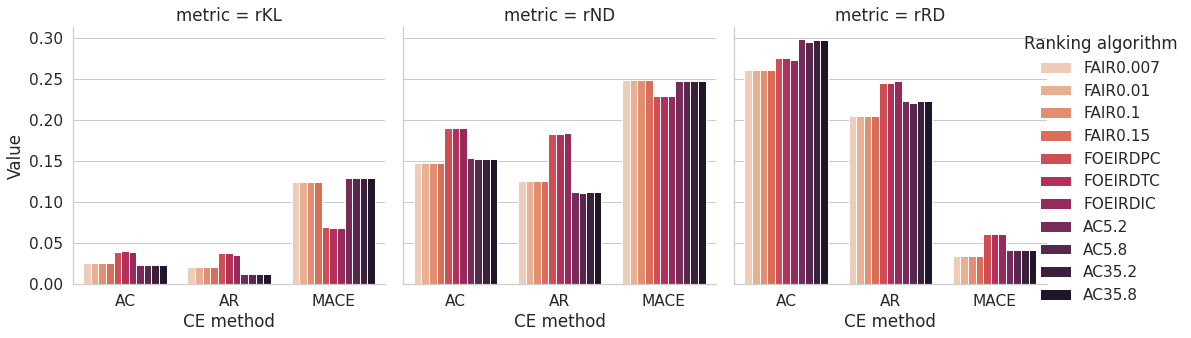

In [ ]:
credit_all_dist = all_new[(all_new['Dataset'] == 'Default of Credit Card Clients')& (all_new['Ranking factor'] == 'Distance')]
sns.set(font_scale=1.4)
sns.set_style("whitegrid")
ax=sns.catplot(x='CE method', y='value', hue='rank',  kind="bar", data=credit_all_dist, col='metric',  palette="rocket_r")
ax._legend.set_title("Ranking algorithm")
ax.set(xlabel='CE method', ylabel='Value')
plt.savefig('credit_all_dist')

,Dataset,cg_method,base,rank,Block_size,Strictness,ratio
0,German Credit,AC,dist,AC,5,2,0.989499
1,German Credit,AC,dist,AC,10,2,0.989499
2,German Credit,AC,dist,AC,15,2,0.989499
3,German Credit,AC,dist,AC,20,2,0.989499
4,German Credit,AC,dist,AC,25,2,0.989499
...,...,...,...,...,...,...,...
95,German Credit,AC,prob,AC,25,8,0.900510
96,German Credit,AC,prob,AC,30,8,0.900510
97,German Credit,AC,prob,AC,35,8,0.900510
196,German Credit,AC,prob,INITIAL,init,init,0.997704
